In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'HR_comma_sep.csv'
data = pd.read_csv(file_path)

# Correct the column names
data.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'time_spent_company',
    'Department': 'department'
}, inplace=True)

# Define features and target
X = data.drop(columns=['satisfaction_level'])
y = data['satisfaction_level']

# Define categorical and numerical columns
categorical_cols = ['department', 'salary']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)



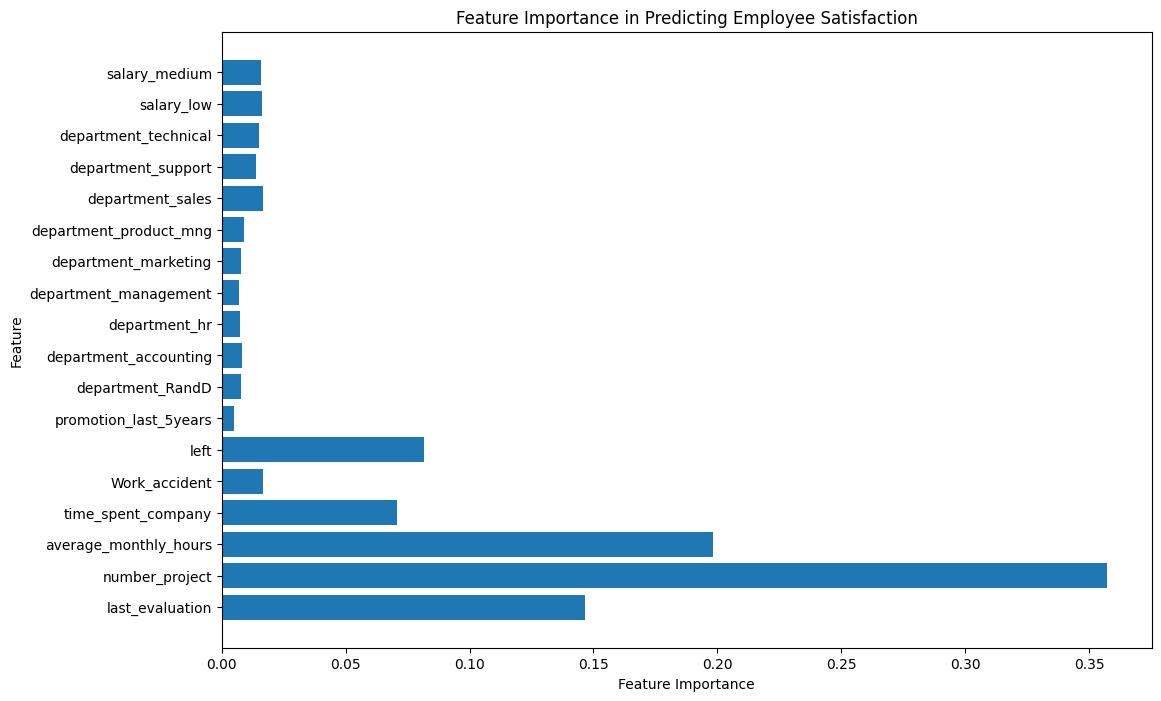

Evaluation Results ( Model):  {'Mean Squared Error': 0.030627068313184423, 'R-squared': 0.4987717835505162}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
evaluation_results = {
    'Mean Squared Error': mse,
    'R-squared': r2
}

# Feature importance
importances = model_pipeline.named_steps['regressor'].feature_importances_
feature_names = numerical_cols + model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()

# Plot feature importance
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Employee Satisfaction')
plt.show()


# Display  evaluation results
print("Evaluation Results ( Model): ", evaluation_results)

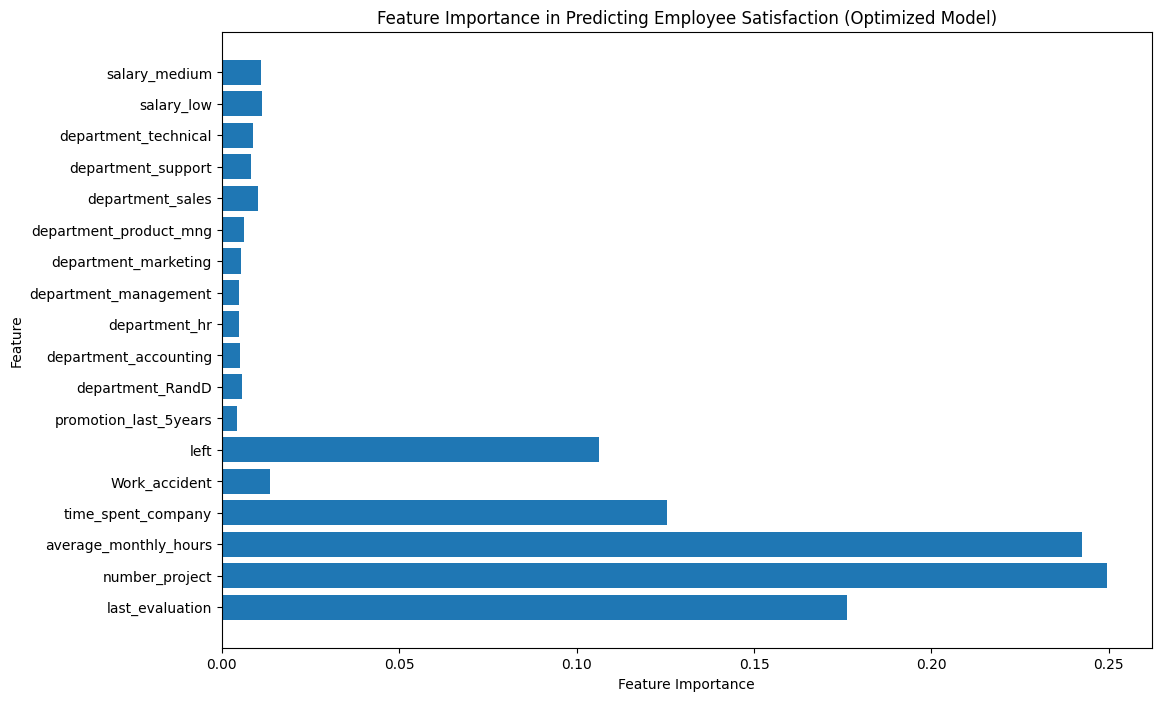

Best Parameters:  {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Evaluation Results (Optimized Model):  {'Mean Squared Error': 0.029536094718296237, 'R-squared': 0.5166261450443288}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create the Grid Search CV object
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train);
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Display the evaluation metrics for the optimized model
evaluation_results_optimized = {
    'Mean Squared Error': mse_optimized,
    'R-squared': r2_optimized
}

# Feature importance for the optimized model
importances_optimized = best_model.named_steps['regressor'].feature_importances_
feature_names_optimized = numerical_cols + best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()

# Plot feature importance for the optimized model
plt.figure(figsize=(12, 8))
plt.barh(feature_names_optimized, importances_optimized)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Employee Satisfaction (Optimized Model)')
plt.show()

# Display the best parameters and the evaluation results
print("Best Parameters: ", best_params)
print("Evaluation Results (Optimized Model): ", evaluation_results_optimized)
